<a href="https://colab.research.google.com/github/cowsilver57/Project/blob/main/%EC%B9%B4%EB%93%9C%EC%82%AC2_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/BankChurners.csv')

# 3. 모델링

## 3-1. 오버샘플링
* 타겟 데이터인 ‘Attrition_Flag(이탈 여부)’의 데이터가 너무 불균형함.
* 이를 해결하기 위해 오버샘플링 진행

- 오버샘플링 방법 : SMOTE
- 방법 선정 이유 : 가장 널리 사용되는 방법 중 하나이기 때문

→ SMOTE는 소수 클래스를 증가시키는 동시에 데이터의 공간을 탐색하여 소수 클래스의 데이터를 보다 잘 대표할 수 있는 합성 데이터를 생성함.

In [4]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# 특성 데이터(X)와 타겟 데이터(y) 설정
X = data.drop('Attrition_Flag', axis=1)  # 특성 데이터
y = data['Attrition_Flag']  # 타겟 데이터

# 데이터에 있는 범주형 변수를 더미 변수로 변환
X_encoded = pd.get_dummies(X)

# 특성 데이터(X)와 타겟 데이터(y) 설정
X = data.drop('Attrition_Flag', axis=1)  # 특성 데이터
y = data['Attrition_Flag']  # 타겟 데이터

# SMOTE를 이용한 오버샘플링
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)


# 오버샘플링 후 클래스의 빈도수 확인
print(pd.Series(y_resampled).value_counts())

Existing Customer    8500
Attrited Customer    8500
Name: Attrition_Flag, dtype: int64


시각화 1

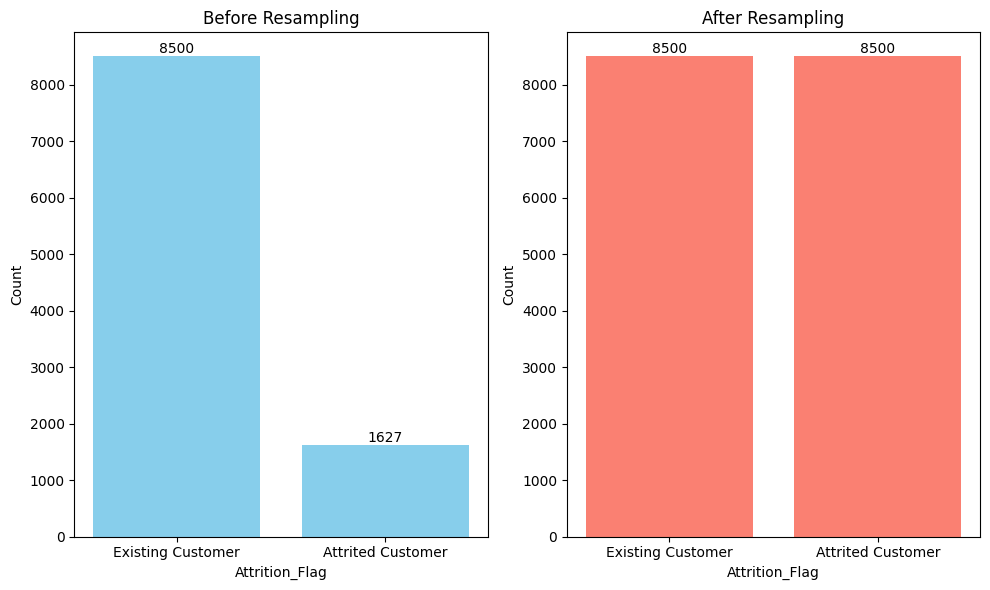

In [5]:
import matplotlib.pyplot as plt

# 오버샘플링 전 클래스의 빈도수
before_resampling_counts = data['Attrition_Flag'].value_counts()

# 오버샘플링 후 클래스의 빈도수
after_resampling_counts = pd.Series(y_resampled).value_counts()

# 플롯 생성
plt.figure(figsize=(10, 6))

# 오버샘플링 전 히스토그램
plt.subplot(1, 2, 1)
bars1 = plt.bar(before_resampling_counts.index, before_resampling_counts.values, color='skyblue')
plt.title('Before Resampling')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')

# 오버샘플링 전 히스토그램 위에 값 표시
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# 오버샘플링 후 히스토그램
plt.subplot(1, 2, 2)
bars2 = plt.bar(after_resampling_counts.index, after_resampling_counts.values, color='salmon')
plt.title('After Resampling')
plt.xlabel('Attrition_Flag')
plt.ylabel('Count')

# 오버샘플링 후 히스토그램 위에 값 표시
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

시각화 2

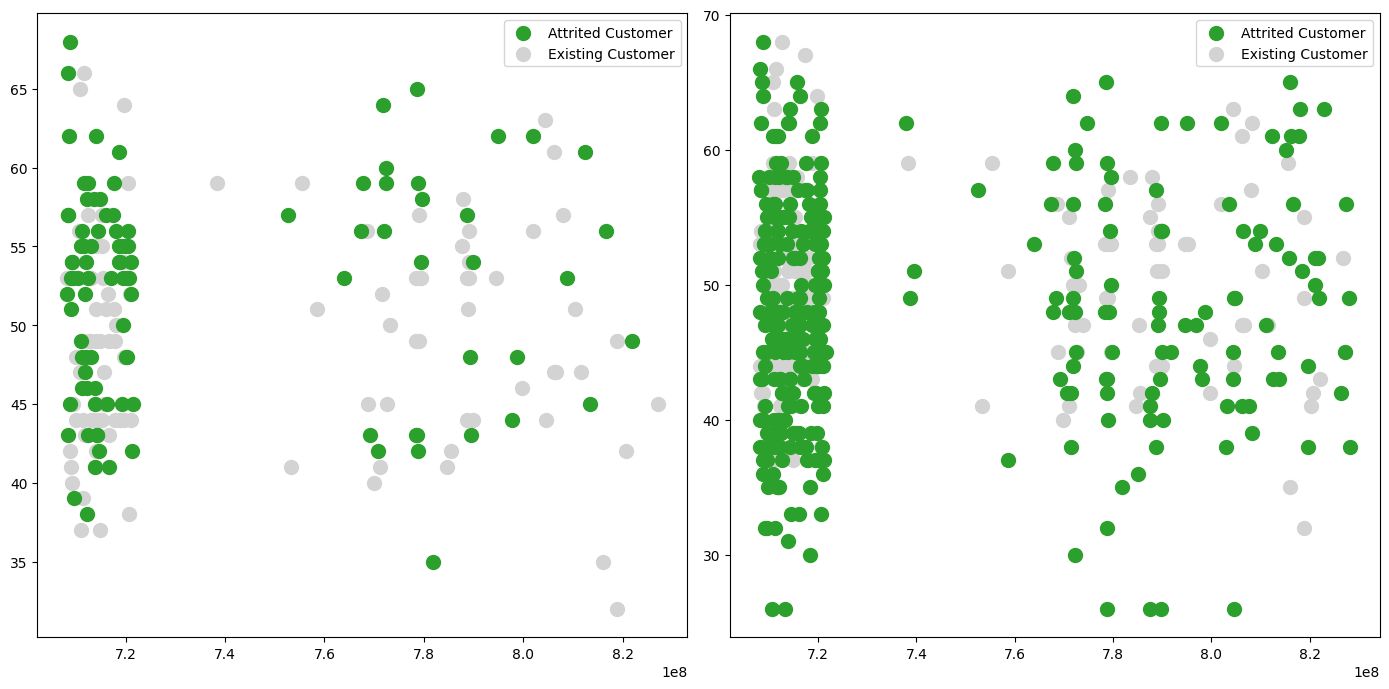

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 오버샘플링 전 데이터에서 소수 클래스의 특성 데이터 샘플
X1 = X_encoded[y == 'Attrited Customer'].iloc[:int(len(X_encoded) * 0.01), :]
# 오버샘플링 전 데이터에서 다수 클래스의 특성 데이터 샘플
X2 = X_encoded[y == 'Existing Customer'].iloc[:int(len(X_encoded) * 0.01), :]

# 오버샘플링 후 데이터에서 소수 클래스의 특성 데이터 샘플
XX1 = X_resampled[y_resampled == 'Attrited Customer'].iloc[:int(len(X_resampled) * 0.02), :]
# 오버샘플링 후 데이터에서 다수 클래스의 특성 데이터 샘플
XX2 = X_resampled[y_resampled == 'Existing Customer'].iloc[:int(len(X_resampled) * 0.01), :]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 오버샘플링 전 scatter plot
axes[0].scatter(X1.iloc[:, 0], X1.iloc[:, 1], color='tab:green', label='Attrited Customer', s=100, zorder=2)  # 이탈 고객
axes[0].scatter(X2.iloc[:, 0], X2.iloc[:, 1], color='lightgray', label='Existing Customer', s=100, zorder=1)  # 미이탈 고객
axes[0].legend()

# 오버샘플링 후 scatter plot
axes[1].scatter(XX1.iloc[:, 0], XX1.iloc[:, 1], color='tab:green', label='Attrited Customer', s=100, zorder=2)  # 이탈 고객
axes[1].scatter(XX2.iloc[:, 0], XX2.iloc[:, 1], color='lightgray', label='Existing Customer', s=100, zorder=1)  # 미이탈 고객
axes[1].legend()

plt.tight_layout()
plt.show()


## 3-2. 오버샘플링 후 모델링
* Linear Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

→ 왜 위의 모델들을 사용? 보편적으로 가장 많이 사용하는 모델들이기 때문임.

### Linear Logistic Regression

In [7]:
#Linear Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# 데이터를 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression 모델 초기화 및 학습
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# 모델 평가
y_pred = log_model.predict(X_test)

# 혼동 행렬 계산
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_test, y_pred, average='macro')
print('Recall:', recall)

# F1-score 계산
f1 = f1_score(y_test, y_pred, average='macro')
print('F1-score:', f1)

Confusion Matrix:
 [[1319  405]
 [ 647 1029]]
--------------------------------------------------
Accuracy: 0.6905882352941176
Precision: 0.6942393067077557
Recall: 0.6895215101695009
F1-score: 0.6883207417283176


### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 모델 초기화 및 학습
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 모델 평가
y_pred = decision_tree.predict(X_test)

# 혼동 행렬 계산
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_test, y_pred, average='macro')
print('Recall:', recall)

# F1-score 계산
f1 = f1_score(y_test, y_pred, average='macro')
print('F1-score:', f1)

Confusion Matrix:
 [[1724    0]
 [   0 1676]]
--------------------------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델 초기화 및 학습
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# 모델 평가
y_pred = random_forest.predict(X_test)

# 혼동 행렬 계산
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# 정밀도 계산
precision = precision_score(y_test, y_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_test, y_pred, average='macro')
print('Recall:', recall)

# F1-score 계산
f1 = f1_score(y_test, y_pred, average='macro')
print('F1-score:', f1)


Confusion Matrix:
 [[1724    0]
 [   0 1676]]
--------------------------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### XGBoost

In [10]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# 타겟 변수를 수치형으로 변환
y_train_numeric = y_train.replace({'Attrited Customer': 0, 'Existing Customer': 1})
y_test_numeric = y_test.replace({'Attrited Customer': 0, 'Existing Customer': 1})

# XGBoost 모델 초기화 및 학습
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train_numeric)

# 모델 평가
y_pred = xgboost.predict(X_test)

# 혼동 행렬 계산
confusion = confusion_matrix(y_test_numeric, y_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

# 정확도 계산
accuracy = accuracy_score(y_test_numeric, y_pred)
print('Accuracy:', accuracy)

# 정밀도 계산
precision = precision_score(y_test_numeric, y_pred, average='macro')
print('Precision:', precision)

# 재현율 계산
recall = recall_score(y_test_numeric, y_pred, average='macro')
print('Recall:', recall)

# F1-score 계산
f1 = f1_score(y_test_numeric, y_pred, average='macro')
print('F1-score:', f1)

Confusion Matrix:
 [[1724    0]
 [   0 1676]]
--------------------------------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


### 결과
* f1 score 평가 지표를 기준으로 결과 확인

* Linear : 0.68
* Decision : 0.93
* Random : 0.96
* **XGBoost : 0.98**

# 4. 모델 요약도

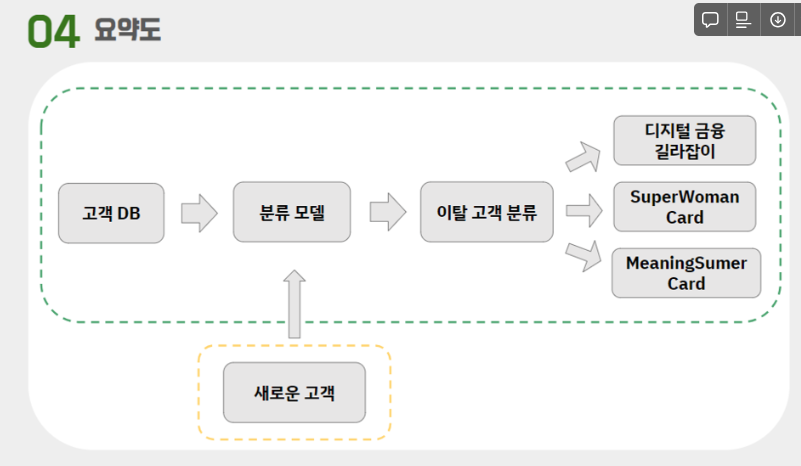

# 5. 비즈니스 전략
* 타켓층인 '소득이 적은 여성'들의 특징을 살펴봄.

### 5-1. 타겟층의 나이대
* 소득 수준이 적은 여성의 나이대는 40대가 가장 많음.

<ipython-input-12-b7c3cf05b1a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Age_Group'] = pd.cut(data3['Customer_Age'], bins=[20, 30, 40, 50, 60, np.inf], labels=['20s', '30s', '40s', '50s', '60s+'])


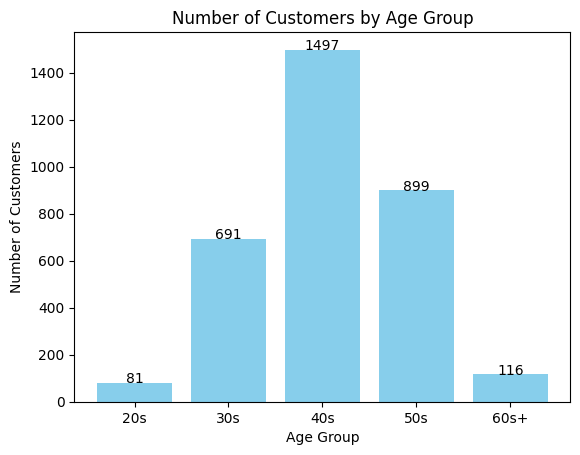

In [12]:
#먼저 여성의 데이터만 분리하기
data2 = data[data['Gender'] == 'F']
data2

#다음으로 소득 수준이 적은 여성의 데이터로 분리하기
data3 = data2[data2['Income_Category'] == 'Less than $40K']
data3

#소득 수준이 적은 여성 데이터의 나이 구간 설정하기
import numpy as np
data3['Age_Group'] = pd.cut(data3['Customer_Age'], bins=[20, 30, 40, 50, 60, np.inf], labels=['20s', '30s', '40s', '50s', '60s+'])
data3

#바차트 그리기
import matplotlib.pyplot as plt

# 연령대별 고객 수 집계
age_group_counts = data3['Age_Group'].value_counts().sort_index()
# 바 차트 그리기
plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
# 막대 위에 값 표시
for i, count in enumerate(age_group_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center')
# 차트 제목과 라벨 설정
plt.title('Number of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
# 차트 표시
plt.show()

5-2. 타겟층의 부양 가족 수
* 40대 여성들의 부양 가족 수를 확인해보면 2-3명인 경우가 가장 많음

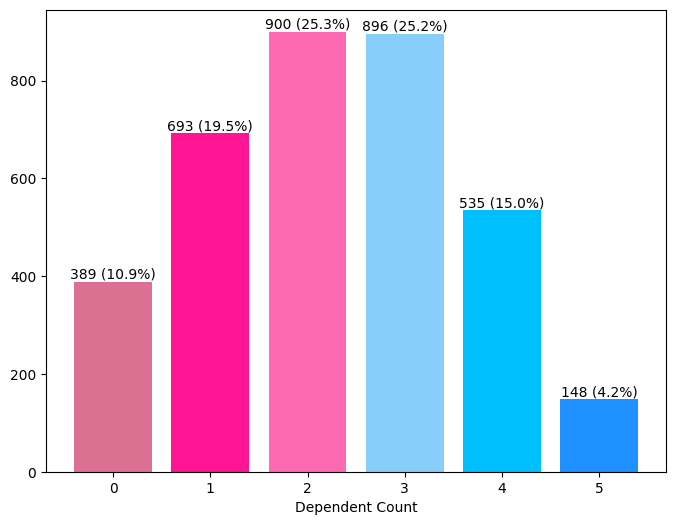

In [13]:
df2 = data[data['Income_Category'] == 'Less than $40K']

# 각 고유 값의 빈도수를 계산
value_counts = df2['Dependent_count'].value_counts()
total = value_counts.sum()

colors = ['#FF69B4','#87CEFA', '#FF1493','#00BFFF', '#DB7093','#1E90FF']
plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval} ({yval/total*100:.1f}%)', va='bottom', ha='center')

plt.xlabel('Dependent Count')
plt.show()

## 5-3. 최종 전략

* 디지털 금융 길라잡이

40대의 ‘디지털 소외’ 발생으로 스마트 금융 상품이 늘어나는 시장에서 금융 상품에 대한 이해도 하락

---

1. 금융앱의 기본적인 사용 방법 교육
2. 금융 투자의 전반적인 교육
3. 각종 금융 상품들의 혜택 교육

* 슈퍼우먼 카드

40대 여성의 부양 가족 수를 고려하여 새로운 카드 상품 출시

---
1. 부양 가족이 자녀일 경우에 유용한 교육비 할인 적용 상품
2. 부양 가족이 부모일 경우에 유용한 요양 병원, 약국 등의 할인 적용 상품

* 미닝슈머 카드

40대 여성들은 본인의 가치관을 드러내기 위해 적극적으로 '미닝 아웃' 소비를 실천함.

---
1달 기준으로 카드 사용 금액의 0.1%(최대 1만원)의 캐시백을 본인의 가치관에 부합하는 분야에 기부가 되는 상품 출시

1. 환경 : 지구온난화, 탄소 중립 실천 포인트
2. 청소년 : 아프리카 불법 아동 노동, 저소득층 청소년
3. 동물 : 유기견,묘, 멸종위기동물